In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install colorthief
!pip install stitching

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import stitching

In [3]:
def getDominantColorFromImage(img,visulize=False):
    average = img.mean(axis=0).mean(axis=0)

    pixels = np.float32(img.reshape(-1, 3))

    n_colors = 4
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)

    dominant = palette[np.argmax(counts)]
    if visulize:
        avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

        indices = np.argsort(counts)[::-1]   
        freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
        rows = np.int_(img.shape[0]*freqs)

        dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
        for i in range(len(rows) - 1):
            dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
            
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
        ax0.imshow(avg_patch)
        ax0.set_title('Average color')
        ax0.axis('off')
        ax1.imshow(dom_patch)
        ax1.set_title('Dominant colors')
        ax1.axis('off')
        plt.show(fig)

    return dominant,counts

In [4]:
def remove_noise(gray, num):
    Y, X = gray.shape
    nearest_neigbours = [[
        np.argmax(
            np.bincount(
                gray[max(i - num, 0):min(i + num, Y), max(j - num, 0):min(j + num, X)].ravel()))
        for j in range(X)] for i in range(Y)]
    result = np.array(nearest_neigbours, dtype=np.uint8)

    return result

def dominantColorToMask(img,dominantColor,ColorThreshold=20,noiseRemovingLevel=8):
    lowerColor= dominantColor - ColorThreshold
    upperColor = dominantColor + ColorThreshold

    maskRGB = ~cv2.inRange(img, lowerColor, upperColor)
    Clean_maskRGB = remove_noise(maskRGB,noiseRemovingLevel)


    return Clean_maskRGB



In [19]:
cap = cv2.VideoCapture('data\\sections.mov')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
     print("Error opening video stream or file")
imgs=[]
frame_number=0

crop_ratio=0.3
IMAGE_H = int(432*(1-crop_ratio))
IMAGE_W = 768


while(cap.isOpened()):

  ret, frame = cap.read()
  if ret == True:
    frame_number+=1

    if frame_number>72:
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        
        resized_img = cv2.resize(img, None, fx = 0.4, fy = 0.4)
        print(resized_img.shape)

        bilateral = cv2.bilateralFilter(resized_img[IMAGE_H:, 0:IMAGE_W], 15, 75, 75) 
        dominant,counts = getDominantColorFromImage(bilateral,visulize=False) 


        Clean_maskRGB = dominantColorToMask(resized_img,dominant,noiseRemovingLevel=7,ColorThreshold=20)
        resultRGB = cv2.bitwise_and(resized_img, resized_img, mask=Clean_maskRGB)

        coun,hire=cv2.findContours(Clean_maskRGB,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        coun = sorted(coun, key=cv2.contourArea)
        
        result = cv2.drawContours(resized_img.copy(),coun[:-1],-1,(0,0,255),2)

        result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
        cv2.imwrite("fram "+str(frame_number-73)+".png",result)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames


(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 768, 3)
(432, 

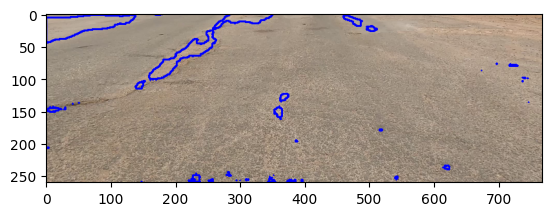

In [30]:
img = cv2.imread("fram 24.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

crop_ratio=0.6
IMAGE_H = int(img.shape[0]*(1-crop_ratio))
IMAGE_W = img.shape[1]

slope= 0.55

src = np.float32([[0, 0], [IMAGE_W, 0], [0, IMAGE_H],[IMAGE_W, IMAGE_H]])
dst = np.float32([[0, 0],[IMAGE_W, 0], [int(IMAGE_W*(slope/2)), IMAGE_H], [int(IMAGE_W*(1-slope/2)), IMAGE_H]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

imgs_cropped=[]
imgs_wrapped=[]

cropped_image = img[IMAGE_H:, 0:IMAGE_W].copy() # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(cropped_image, M, (IMAGE_W, int(img.shape[0]*(crop_ratio)))) # Image warping
imgs_cropped.append(cropped_image)
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
warped_img = cv2.filter2D(warped_img, -1, kernel)
imgs_wrapped.append(warped_img)#[:, int(IMAGE_W*(slope/2)):int(IMAGE_W*(1-slope/2))])


# for val in src:
#     cv2.circle(cropped_image,(int(val[0]),int(val[1])),40,(0,255,255),-1)

plt.imshow(imgs_cropped[-1]) # Show results
plt.show()


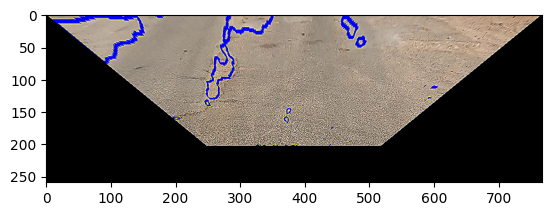

In [31]:
plt.imshow(imgs_wrapped[-1]) # Show results
plt.show()


In [ ]:
# testImg=cv2.convertScaleAbs(imgs_wrapped[-1], alpha=1.5,beta= -20)
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# testImg = cv2.filter2D(imgs_wrapped[-1], -1, kernel)
# plt.imshow(testImg) # Show results
# plt.show()



In [ ]:

imageSticher= cv2.Stitcher_create(mode=1)

# error, stitched_image1= imageSticher.stitch(imgs_wrapped[0:2])
error, stitched_image2= imageSticher.stitch(imgs_wrapped[-20:-1])
# if not error:
#     cv2.imshow("stitched_image", stitched_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
print(error)


0


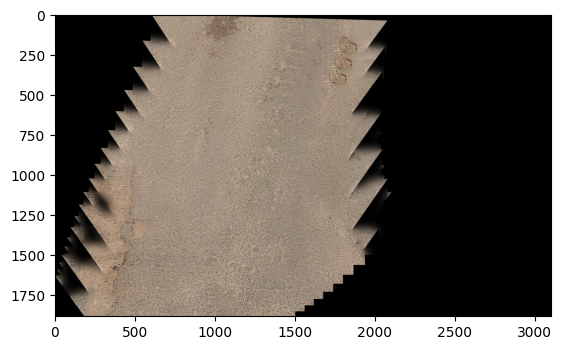

In [ ]:
cv2.imwrite("stitched_image.png", stitched_image2)
plt.imshow(stitched_image2)
plt.show()

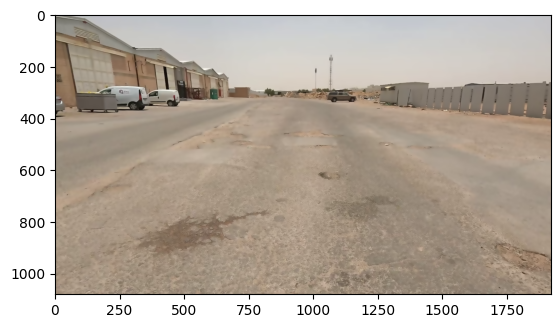

In [ ]:
bilateral = cv2.bilateralFilter(imgs[-1], 15, 75, 75)

plt.imshow(bilateral) # Show results
plt.show()

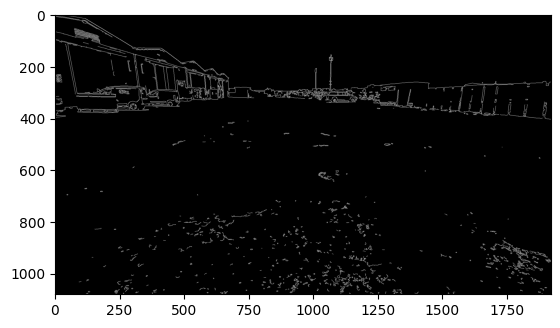

In [ ]:
# img_inv = cv2.warpPerspective(warped_img, Minv, (IMAGE_W, IMAGE_H)) # Inverse transformation
# plt.imshow(img_inv) # Show results
# plt.show()


# resize image
# imgr = cv2.resize(cropped_image, (500, 450), interpolation=cv2.INTER_CUBIC)
  
# convert image to gray scale image
gray = cv2.cvtColor(bilateral, cv2.COLOR_RGB2GRAY)
  
# apply laplacian blur
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  
# sobel x filter where dx=1 and dy=0
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=7)
  
# sobel y filter where dx=0 and dy=1
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=7)
  
# combine sobel x and y
sobel = cv2.bitwise_and(sobelx, sobely)


edges = cv2.Canny(image=gray, threshold1=100, threshold2=200) # Canny Edge Detection

# plt.subplot(2, 2, 1)
# plt.imshow(laplacian, cmap='gray')
# plt.title('Laplacian')

# plt.subplot(2, 2, 2)
# plt.imshow(sobelx, cmap='gray')
# plt.title('SobelX')

# plt.subplot(2, 2, 3)
# plt.imshow(sobely, cmap='gray')
# plt.title('SobelY')

# plt.subplot(2, 2, 4)
# plt.imshow(sobel, cmap='gray')
# plt.title('Sobel')

plt.imshow(edges, cmap='gray')
# plt.title('Sobel')

plt.show()


In [ ]:
# edges = cv2.Canny(gray,)
# plt.subplot(121),plt.imshow(gray,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()

Text(0, 0.5, 'Pixel count')

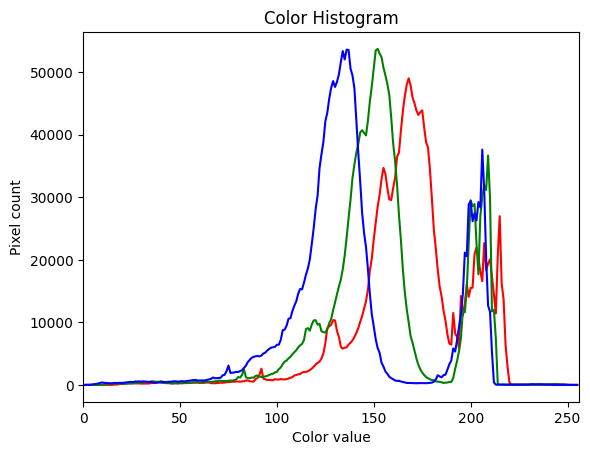

In [ ]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        bilateral[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")


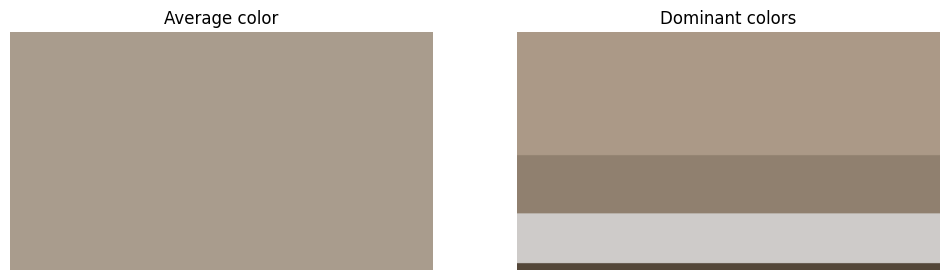

In [ ]:


dominant,counts = getDominantColorFromImage(bilateral,visulize=True) # use smothed guasian or blitteral image of whole the road

In [ ]:
print(dominant)

[171.0147  153.99654 135.75887]


In [ ]:

resized_img = cv2.resize(imgs[-1], None, fx = 0.4, fy = 0.4)

# plt.imshow(color) # Show results
# plt.show()
# print(color.shape)
# height,width,channels = color.shape
# b,g,r = cv2.split(color)
# rgb_split = np.empty([height,width*3,3],'uint8')
# rgb_split[:, 0:width] = cv2.merge([b,b,b])
# rgb_split[:, width:width*2] = cv2.merge([g,g,g])
# rgb_split[:, width*2:width*3] = cv2.merge([r,r,r])
# cv2.imshow("Channels",rgb_split)
# cv2.moveWindow("Channels",0,height)
# hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)
# h,s,v = cv2.split(hsv)
# hsv_split = np.concatenate((h,s,v),axis=1)
# cv2.imshow("Split HSV",hsv_split)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
# from matplotlib import cm
# from matplotlib import colors

# h, s, v = cv2.split(resized_img)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# pixel_colors = resized_img.reshape((np.shape(resized_img)[0]*np.shape(resized_img)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.show()


In [ ]:
# print(palette)
print(counts/max(counts))
for i in range(len(palette)):
    light_orange = palette[i] - 10
    dark_orange = palette[i] + 10

    
    maskRGB = cv2.inRange(bilateral, light_orange, dark_orange)
    resultRGB = cv2.bitwise_and(bilateral, bilateral, mask=maskRGB)
    # print(resized_img)
    plt.subplot(len(palette), 2, i*2+1)
    plt.imshow(maskRGB, cmap="gray")
    plt.subplot(len(palette), 2, i*2+2)
    plt.imshow(resultRGB)
plt.show()


[0.47322919 1.         0.40469204 0.05366831]


NameError: name 'palette' is not defined

In [ ]:
# import cv2
# import numpy as np

# def empty(i):
#     pass


# cv2.namedWindow("TrackedBars")
# cv2.resizeWindow("TrackedBars", 640, 240)


# def on_trackbar(val):
    

#     hue_min = cv2.getTrackbarPos("Hue Min", "TrackedBars")
#     hue_max = cv2.getTrackbarPos("Hue Max", "TrackedBars")
#     sat_min = cv2.getTrackbarPos("Sat Min", "TrackedBars")
    # sat_max = cv2.getTrackbarPos("Sat Max", "TrackedBars")
    # val_min = cv2.getTrackbarPos("Val Min", "TrackedBars")
    # val_max = cv2.getTrackbarPos("Val Max", "TrackedBars")

    # lower = np.array([hue_min, sat_min, val_min])
    # upper = np.array([hue_max, sat_max, val_max])

    # imgMASK = cv2.inRange(imgHSV, lower, upper)

    # bilateral = cv2.bilateralFilter(cropped_image, hue_min, hue_min, hue_max)


    # cv2.imshow("Output1", cv2.cvtColor(resized_img, cv2.COLOR_RGB2BGR))
    # cv2.imshow("Output2", bilateral)
    # cv2.imshow("Mask", imgMASK)


# cv2.createTrackbar("Hue Min", "TrackedBars", 0, 179, on_trackbar)
# cv2.createTrackbar("Hue Max", "TrackedBars", 0, 179, on_trackbar)
# cv2.createTrackbar("Sat Min", "TrackedBars", 0, 255, on_trackbar)
# cv2.createTrackbar("Sat Max", "TrackedBars", 255, 255, on_trackbar)
# cv2.createTrackbar("Val Min", "TrackedBars", 0, 255, on_trackbar)
# cv2.createTrackbar("Val Max", "TrackedBars", 255, 255, on_trackbar)

# img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2BGR)
# imgHSV = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)

# # Show some stuff
# on_trackbar(0)
# # Wait until user press some key
# cv2.waitKey(0)
# cv2.destroyAllWindows()

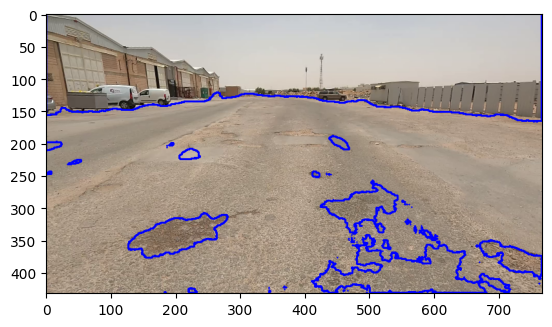

In [ ]:

Clean_maskRGB = dominantColorToMask(resized_img,dominant,noiseRemovingLevel=7,ColorThreshold=20)
resultRGB = cv2.bitwise_and(resized_img, resized_img, mask=Clean_maskRGB)

coun,hire=cv2.findContours(Clean_maskRGB,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
result = cv2.drawContours(resized_img.copy(),coun,-1,(0,0,255),2)

cv2.imwrite("input_out.png",result)
cv2.imwrite("input.png",resized_img)
plt.imshow(result)
# plt.subplot(3, 2, 3)
# plt.imshow(maskHSV, cmap="gray")
# plt.subplot(3, 2, 4)
# plt.imshow(resultHSV)
# plt.subplot(3, 2, 5)
# plt.imshow(imgGray)
# plt.subplot(3, 2, 6)
# plt.imshow(resized_img)
plt.show()


In [ ]:
def pipeline(image):
    
    bilateral = cv2.bilateralFilter(image, 15, 75, 75)
    dominant,counts = getDominantColorFromImage(bilateral,visulize=True) # use smothed guasian or blitteral image of whole the road

    resized_img = cv2.resize(image, None, fx = 0.4, fy = 0.4)

    Clean_maskRGB = dominantColorToMask(resized_img,dominant,noiseRemovingLevel=7,ColorThreshold=20)
    resultRGB = cv2.bitwise_and(resized_img, resized_img, mask=Clean_maskRGB)

    coun,hire=cv2.findContours(Clean_maskRGB,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
    return coun
    